In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import cProfile
%load_ext line_profiler
from line_profiler import LineProfiler
%load_ext memory_profiler

from beam.beams import laserbeam
import numpy as np

path = '/media/robert/Data_Storage/Data/Optimization/Beam_Module/'

In [2]:
params = {'Nx' : 2**10,
          'Ny' : 2**10,
          'X' : 2000,
          'Y' : 2000,
          'lam' : 0.8,
          'path' : path,
          'name' : 'testGaussianBeam',
          'threads' : 4,
          'cyl' : False,
          'E0' : 1e9,
          'waist' : 100,
          'z' : -1e5
          }

beam = laserbeam.GaussianLaser(params)

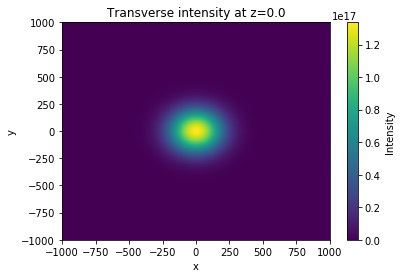

In [3]:
beam.plot_current_intensity()

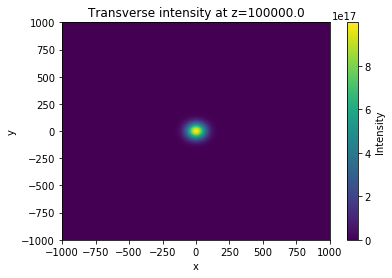

In [4]:
beam.propagate(1e5, 1.0)
beam.plot_current_intensity()

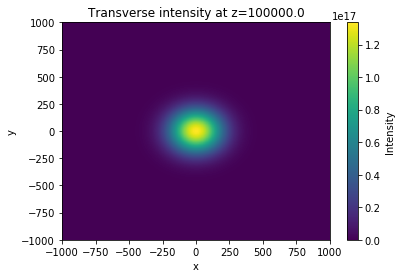

In [5]:
beam.propagate(1e5, 1.0)
beam.plot_current_intensity()

In [6]:
# Test cylindrically symmetric beams
params = {'Nx' : 2**10,
          'Ny' : 2**10,
          'X' : 2000,
          'Y' : 2000,
          'lam' : 0.8,
          'path' : path,
          'name' : 'testCylBeam',
          'threads' : 4,
          'cyl' : True,
          'E0' : 1e9,
          'waist' : 100,
          'z' : -1e5
          }

beamCyl = laserbeam.GaussianLaser(params)

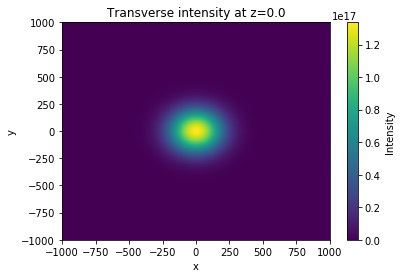

In [7]:
beamCyl.plot_current_intensity()

In [8]:
# Lets try a little speed test
beam.initialize_field()
z = np.linspace(0, 2e5, 2**8)
%timeit beam.propagate(z, 1.0)
%timeit beamCyl.propagate(z, 1.0)

1 loop, best of 3: 25.6 s per loop
1 loop, best of 3: 6.92 s per loop


In [9]:
beam.clear_dir()
beamCyl.clear_dir()